In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

In [2]:
df = pd.read_csv('/kaggle/input/predict-students-dropout-and-academic-success/data.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [3]:
# Checking for missing values and drop if necessary
df.dropna(inplace=True)

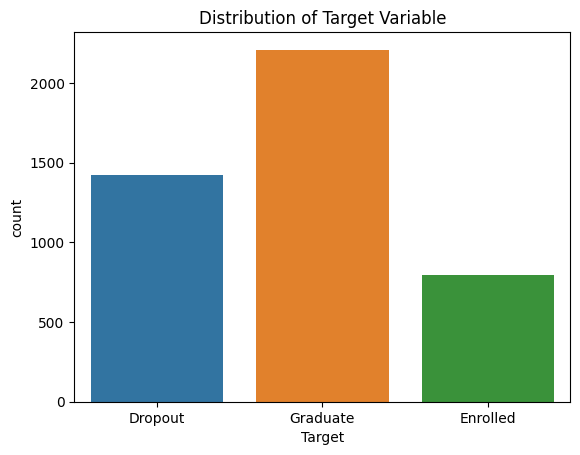

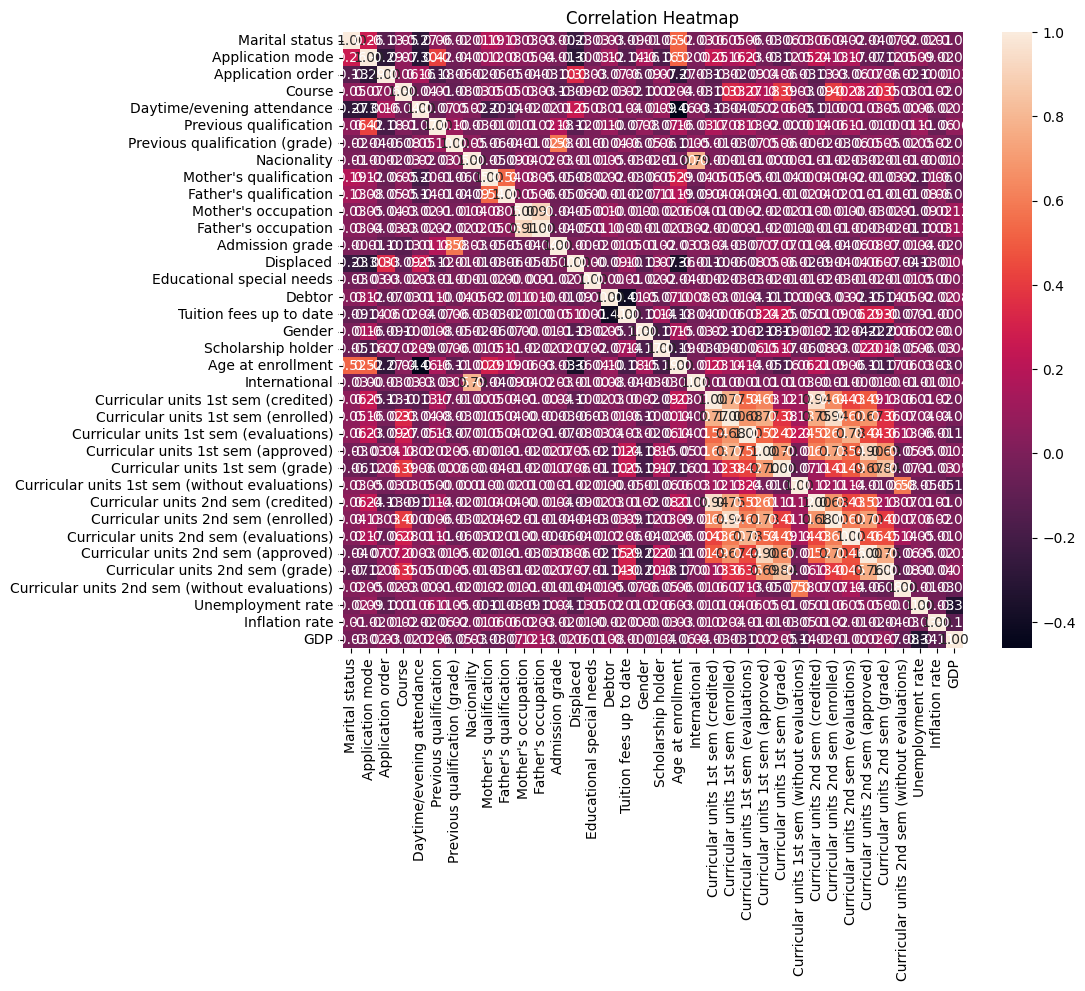

In [4]:
# Visualize the target variable distribution
sns.countplot(x='Target', data=df)
plt.title('Distribution of Target Variable')
plt.show()

# Correlation heatmap (only for numeric features)
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_features].corr(), annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [5]:
# Encode categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column] = LabelEncoder().fit_transform(df[column])

# Feature scaling
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [6]:
# Split the data into features and target
X = df.drop('Target', axis=1)
y = df['Target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Initialize and train the model
model = RandomForestClassifier(random_state=42, n_estimators=100, n_jobs=-1)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.77      0.81       316
           1       0.49      0.29      0.37       151
           2       0.76      0.92      0.83       418

    accuracy                           0.76       885
   macro avg       0.70      0.66      0.67       885
weighted avg       0.74      0.76      0.74       885

Confusion Matrix:


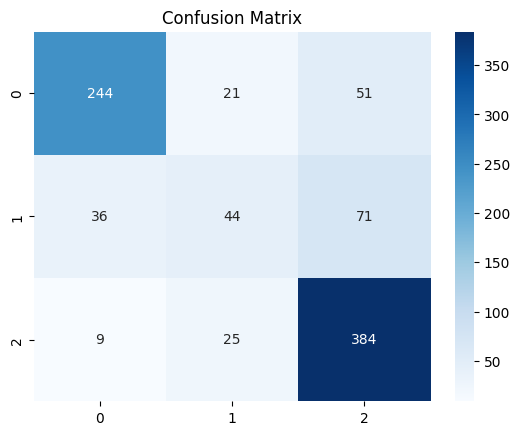

In [8]:
# Evaluate the model
print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

                                                importance
Curricular units 2nd sem (approved)               0.131092
Curricular units 2nd sem (grade)                  0.111236
Curricular units 1st sem (approved)               0.097350
Curricular units 1st sem (grade)                  0.063543
Curricular units 2nd sem (evaluations)            0.043673
Tuition fees up to date                           0.043162
Admission grade                                   0.040832
Previous qualification (grade)                    0.038131
Curricular units 1st sem (evaluations)            0.037368
Age at enrollment                                 0.035585
Course                                            0.032709
Father's occupation                               0.028160
Mother's occupation                               0.025980
GDP                                               0.023261
Unemployment rate                                 0.022886
Curricular units 2nd sem (enrolled)               0.0225

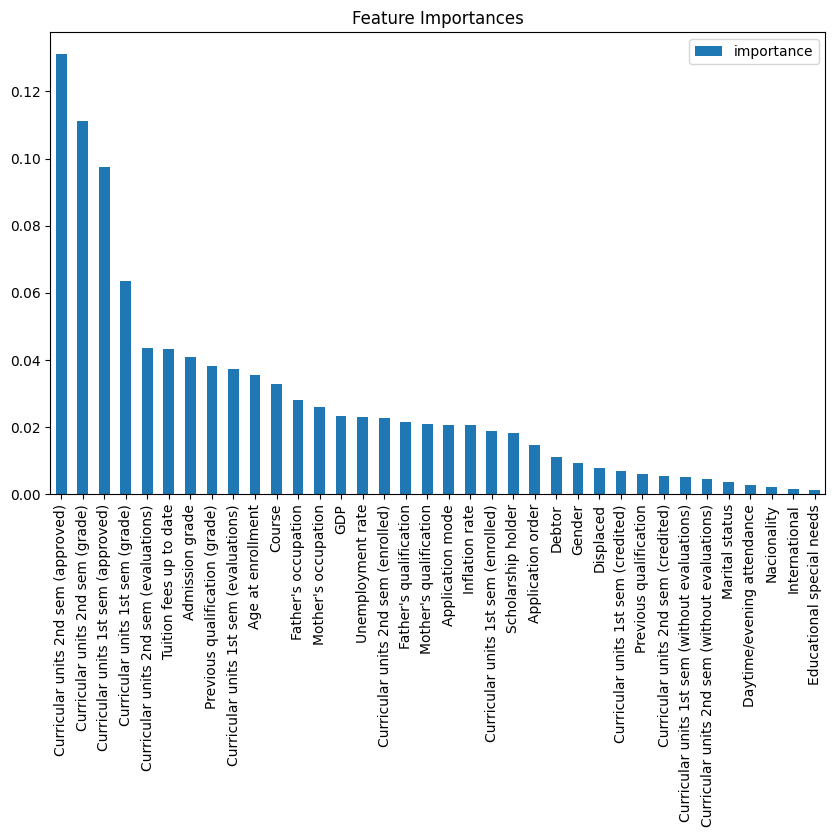

In [9]:
# Display feature importance
feature_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

# Plot feature importance
feature_importances.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importances')
plt.show()

In [10]:
joblib.dump(model, 'random_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']